# TOF data
Data taken at intervals of $T=0.1ms$, where $T$ represents the period of free flight after trapping. Captured in sequences of 10 ranging from 0.1ms to 1.0ms. 

In [1]:
import os
import sys
sys.path.append("../")
import datarun
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

In [2]:
d = datarun.Experiment(
    vstart = .1,
    vend = 1.0,
    vstep = .1, 
    idx_start = 11,
    datapath = "../data/mar02/",
    numtrials = 10,
    mask=0.25
)

|████████████████████████████████████████| 100/100 [100%] in 3:00.9 (0.55/s)                                            


In [33]:
sigma_times = d.structure_data(lambda d : d.popt_y[2]**2)

removed_count = 0
for key in sigma_times:
    sigma = np.std(sigma_times[key]) 
    mean = np.mean(sigma_times[key])
    for val in sigma_times[key]:
        if np.abs(val-mean) > 2*sigma:
            sigma_times[key].remove(val)
            print(key, val)

means = [np.mean(arr) for arr in sigma_times.values()]
errs = [np.std(arr) for arr in sigma_times.values()]/np.sqrt(10)
time_list = np.array(list(sigma_times.keys()))

0.1 1.1185816690834707e-06
0.30000000000000004 1.019261523288845e-06
0.4 1.45093900274502e-06
0.5 1.5655502482416918e-06
0.6 1.7096657478745853e-06
0.7000000000000001 1.8566455094510638e-06
0.8 2.8614411826537785e-06
1.0 1.3272297134712994e-06


In [35]:
popt, pcov = curve_fit(lambda x,a,b:a*x**2+b, d.vlist, means, sigma=errs)
popt

array([8.3756427e-07, 1.0198907e-06])

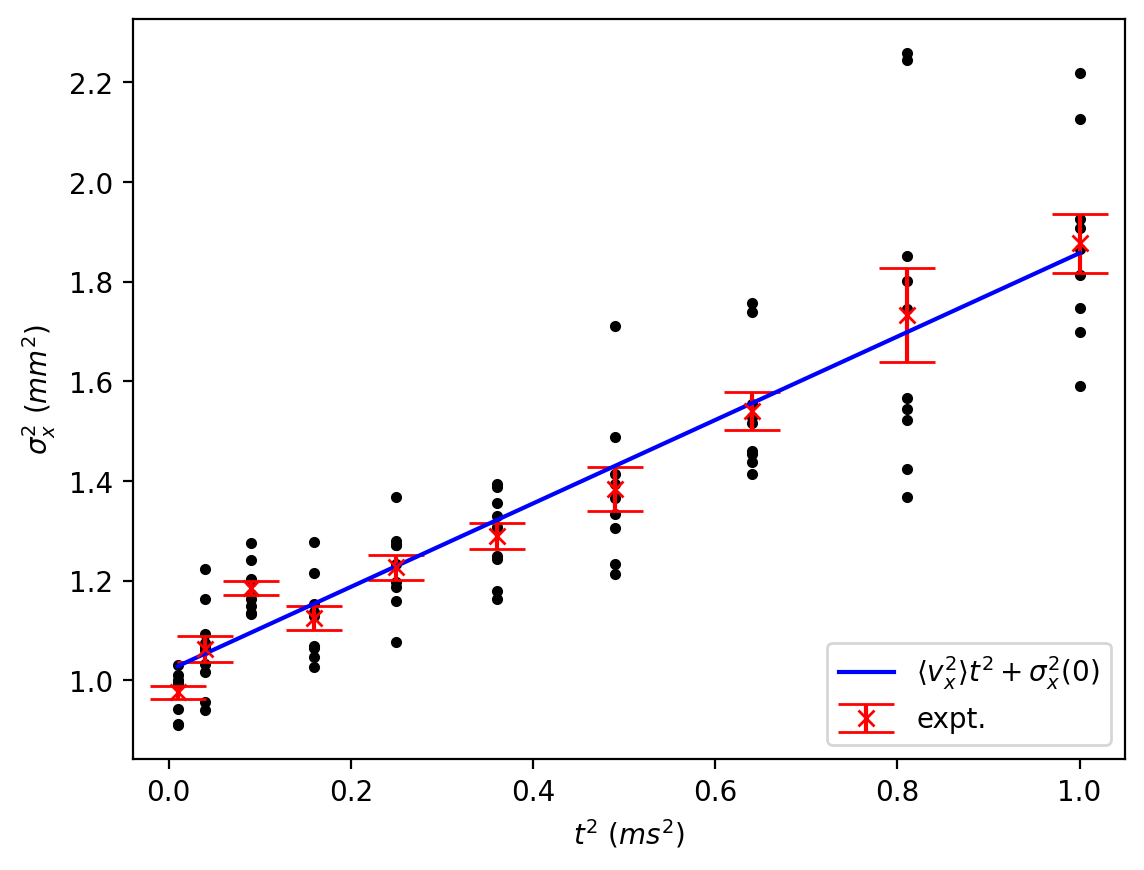

In [36]:
scale = 1e3
plt.errorbar(np.array(list((sigma_times.keys())))**2, scale**2*np.array(means), yerr = np.array(errs)*scale**2, linestyle = "None", c = 'r', capsize=10, marker = "x", label = "expt.")
for time, arr in sigma_times.items():
    for val in arr:
        plt.scatter(time**2, scale**2*val, c="k", marker = ".")

xaxis = np.linspace(min(d.vlist), max(d.vlist), 100)
plt.plot(xaxis**2, scale**2*(popt[0]*xaxis**2+popt[1]), c="b", label = r"$\langle v_x^2\rangle t^2+\sigma_x^2(0)$")

plt.xlabel(r"$t^2 \ (ms^2)$")
plt.ylabel(r"$\sigma_x^2 \ (mm^2)$")
plt.gcf().set_dpi(200)
plt.legend(loc = "lower right")

In [37]:
pcov

array([[ 1.03435688e-14, -1.57834937e-15],
       [-1.57834937e-15,  6.40261219e-16]])

In [38]:
v_err = np.sqrt(pcov[0][0])

In [39]:
popt

array([8.3756427e-07, 1.0198907e-06])

In [40]:
v_rms = np.sqrt(popt[0])*1e3*np.sqrt(3)
v_err = np.sqrt(pcov[0][0])*3*1e6/(np.sqrt(9))*3

First, we have $\langle (x+vt)^2 \rangle = \langle x^2 \rangle + \langle v^2\rangle t^2$, using $\langle v \rangle = 0$, and thus the fit parameter $a$ gives the RMS velocity. Plugging this into the Maxwell-Bolzmann distribution,
$$
v_{rms} = \sqrt{\frac{3RT}{M}} \Rightarrow T = \frac{v_{rms}^2 M}{3R}
$$

$$
\sqrt{v_{rms}^2+\delta v} \approx \sqrt{v_{rms}^2}+\frac{\delta v}{2\sqrt{v_{rms}^2}}
$$

In [41]:
v_rms**2*.0391/(3*8.315)*1e3

3.9385162896021324

In [42]:
v_err*.0391/(3*8.315)*1e3

0.47824419566555687

In [43]:
v_rms**2

2.512692809312665

In [44]:
v_err/v_rms

0.19248050978350345

In [45]:
v_err/(2*np.sqrt(v_rms))

0.12116902513518063

In [46]:
v_rms

1.585147567046256

In [47]:
v_err

0.3051100117871436